In [1]:
#GRAPHS TO USE IN PRESENTATION: The lots of little histograms cell, the graphs commented there. Also the pivot table with the highest and lowest ratios to show which categories get the most multiples and which dont
# At the moment these are the two libraries we need to import
import pandas as pd
import matplotlib as plt
import numpy as np
get_ipython().magic(u'matplotlib inline')

In [2]:
#Goals vs. Pledged? Launch Date, Currency
data = pd.read_csv("kickstarter.csv")

In [3]:
# Save the imported csv data as new DataFrame, 
# we can always call this later if we want to start from scratch
df_data = pd.DataFrame(data)
#df_data.head(10)

In [4]:
# Start working with a main DataFrame
# Convert date columns to datetime format, have Pandas 'infer' format
df_Kickstarter = df_data
df_Kickstarter["deadline"] = pd.to_datetime(df_data["deadline"], infer_datetime_format=True)
df_Kickstarter["launched"] = pd.to_datetime(df_data["launched"], infer_datetime_format=True)
df_Kickstarter["category"] = df_data["category"].astype("category")
df_Kickstarter['ratio'] = df_Kickstarter['pledged'].div(df_Kickstarter['goal'])
df_Kickstarter = df_Kickstarter.drop(df_Kickstarter[df_Kickstarter.goal < 500].index)
df_KS = df_Kickstarter

In [5]:
#Mean goal of successful projects is $11,066.71
df_KS[df_KS.state == 'successful'].goal.mean()

11066.717449083459

In [5]:
df_KickstarterUS = df_Kickstarter[df_Kickstarter["country"] == "US"]
# Group by category, sort by goal
#df_KickstarterUS.groupby(by="category").sum().sort_values(by="goal", ascending=False).head(10)

In [24]:
goal_by_cat = pd.pivot_table(data = df_Kickstarter, index = 'category', aggfunc = 'sum').sort_values(by='goal', ascending=False)
goal_by_catavg = pd.pivot_table(data = df_Kickstarter, index = 'category', aggfunc = 'mean').sort_values(by='goal', ascending=False)
#goal_by_cat.head(10)
goal_by_catavg.head(10)
#df_Kickstarter.groupby(by='category').sum().sort_values(by='backers', ascending=False)

,ID,backers,goal,pledged,ratio,usd pledged,usd_goal_real,usd_pledged_real
category,,,,,,,,
Movie Theaters,1.041590e+09,102.565789,1.588135e+06,15960.239254,0.306016,6116.425833,1.632234e+06,9654.317237
Space Exploration,1.075132e+09,327.283828,6.541511e+05,31247.105545,0.849729,22036.210957,6.141916e+05,32601.026040
Fantasy,1.052387e+09,114.767081,6.509020e+05,10516.578478,0.440071,8674.181025,6.163060e+05,9980.416739
Video,1.064749e+09,20.920200,5.955444e+05,1705.681596,0.172553,1175.467282,5.793797e+05,1728.276708
Architecture,1.099566e+09,52.925876,4.774535e+05,7153.751267,0.399971,3896.941186,4.245240e+05,6555.853733
Science Fiction,1.057459e+09,94.346853,4.421499e+05,8751.327510,0.523311,6617.675720,4.215433e+05,8489.898587
Television,1.058001e+09,76.268612,4.227698e+05,8936.162274,0.206690,8304.010503,4.520462e+05,8988.603109
Action,1.054532e+09,49.087518,3.571797e+05,3896.046399,0.223312,3113.971047,3.367099e+05,3900.621937
Translations,1.132402e+09,35.905405,2.682641e+05,3208.835946,0.463770,2061.620405,2.625333e+05,2467.726081


In [65]:
#Top categories by ratio are Camera Equipment, 3D Printing, Sound, Wearables, and Fabrication Tools
pl_by_cat = pd.pivot_table(data = df_KS, index = 'category', aggfunc = 'mean').sort_values(by='ratio', ascending=False)
pl_by_cat.head(10)

,ID,backers,goal,pledged,ratio,usd pledged,usd_goal_real,usd_pledged_real
category,,,,,,,,
Tabletop Games,1.067959e+09,443.304896,16616.021662,35737.935123,3.160388,24310.816842,15447.493712,34246.158428
Camera Equipment,1.074005e+09,437.690998,42230.167883,85626.519927,2.700382,46505.796959,40350.778783,82346.586472
DIY Electronics,1.056235e+09,260.104094,36729.863544,27748.594035,2.489481,19737.175404,21130.080386,23505.586959
Robots,1.081956e+09,173.848263,268147.964461,37914.309250,2.376961,23645.271097,195756.361920,34093.545923
Wearables,1.047307e+09,394.520953,66811.912901,63250.296483,1.878252,32376.560509,61358.125760,56996.205670
3D Printing,1.074830e+09,235.298220,48440.238872,72140.307240,1.817931,52798.070550,47239.531172,67205.740742
Product Design,1.075559e+09,281.775822,36503.239446,32417.934357,1.735302,20507.407248,31965.550821,29090.485051
Letterpress,1.148238e+09,121.680851,6162.106383,9874.972766,1.720616,4537.572766,6535.291064,9986.262340
Chiptune,1.214905e+09,530.793103,7794.827586,20790.041034,1.684973,20954.183448,8362.192069,21282.243103


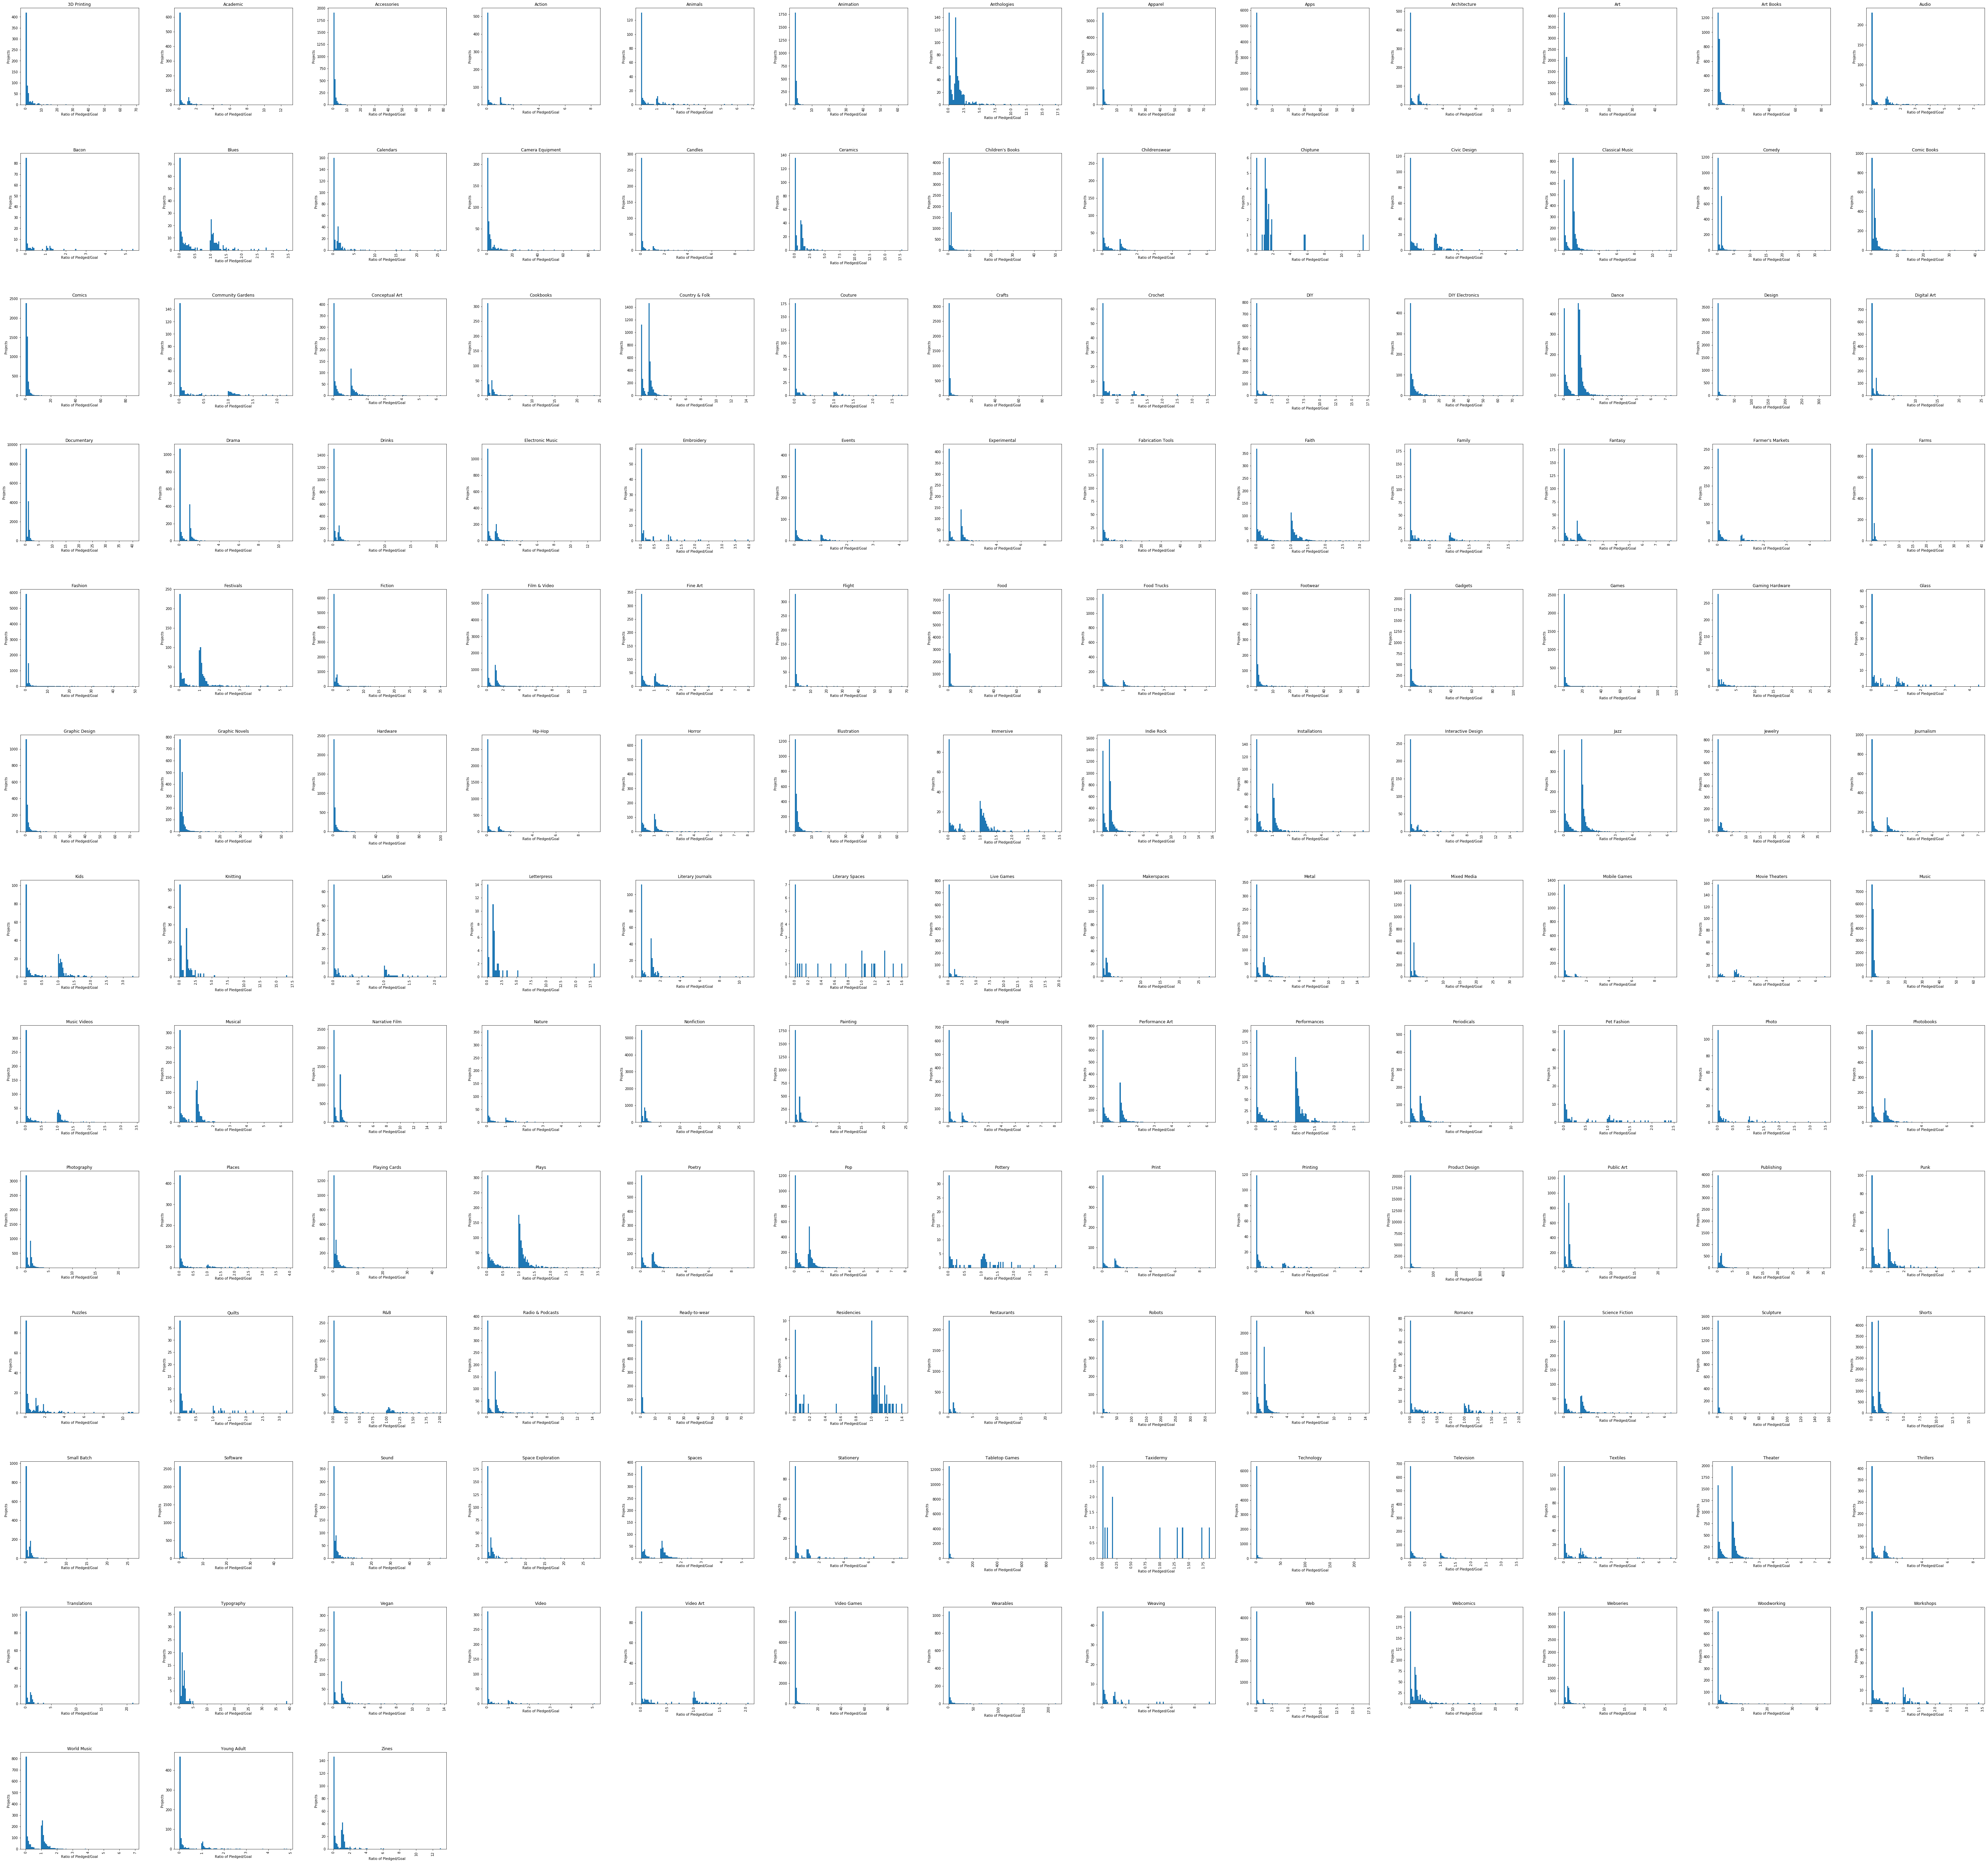

In [62]:
#USE THIS CELL
#THIS PRINTS LOTS OF TINY HISTOGRAMS
#Good examples of projects that cluster around 0 and 1 are Bacon, Civic Design, Festivals, Performance Art, Theater, 
fig_ratio = df_KS['ratio'].hist(by=df_KS['category'],xlabelsize = 10, bins = 100, figsize=(100,100))
for ax in fig_ratio.flatten():
    ax.set_xlabel("Ratio of Pledged/Goal")
    ax.set_ylabel("Projects")
#

In [27]:
#for count in range(df_KS['category']):
df_KS[df_KS["category"] == "Bacon"].sort_values(by='goal', ascending=False)
#bacon = df_KS['category'].filter(like='Bacon')
#bacon.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,ratio
33312,1169194659,An Old Fashion Butcher Shop,Bacon,Food,USD,2015-06-01,650000.0,2015-04-12 02:23:02,100.0,failed,1,US,100.00,100.00,650000.00,0.000154
241729,299338200,Pyrenees Pork,Bacon,Food,AUD,2014-08-16,550000.0,2014-07-17 07:20:48,0.0,failed,0,AU,0.00,0.00,512151.97,0.000000
149389,1759248298,Holistically Managed Pasture Raised Meats! (Ca...,Bacon,Food,USD,2015-10-31,500000.0,2015-09-02 00:54:02,0.0,canceled,0,US,0.00,0.00,500000.00,0.000000
67378,1342943862,Bacon Chips with flawors in sweden,Bacon,Food,SEK,2015-02-18,300000.0,2014-12-20 01:04:29,10.0,failed,2,SE,1.30,1.19,35598.17,0.000033
6139,1031356553,The Chivalrous Society on the Cutting Edge of ...,Bacon,Food,USD,2014-09-28,250000.0,2014-09-10 16:35:50,0.0,failed,0,US,0.00,0.00,250000.00,0.000000
20325,1103285730,Ultimate Bacon Doughnut!!,Bacon,Food,USD,2017-12-25,250000.0,2017-10-26 19:27:40,0.0,failed,0,US,0.00,0.00,250000.00,0.000000
309027,644153974,THE ESSENCE OF BACON,Bacon,Food,USD,2014-08-29,250000.0,2014-07-30 00:18:56,15.0,failed,2,US,15.00,15.00,250000.00,0.000060
267868,432921557,Marley's Gnarly Canine Cookies,Bacon,Food,USD,2017-01-08,200000.0,2016-12-11 17:46:53,50.0,failed,1,US,50.00,50.00,200000.00,0.000250
163903,1834057179,Flavored Popcorn Store + candy,Bacon,Food,USD,2014-11-08,125000.0,2014-10-09 21:49:57,0.0,failed,0,US,0.00,0.00,125000.00,0.000000
356397,885346666,Grab a Fork for some Patriotic Pork!,Bacon,Food,USD,2014-11-29,100000.0,2014-09-30 18:33:38,11.0,failed,2,US,11.00,11.00,100000.00,0.000110


In [39]:
df_KSbacon = df_KS[df_KS["category"] == "Bacon"]

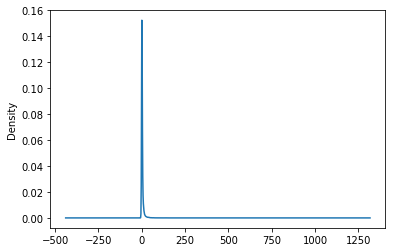

In [57]:
df_KS[df_KS["category"] == "Tabletop Games"]['ratio'].plot.kde()

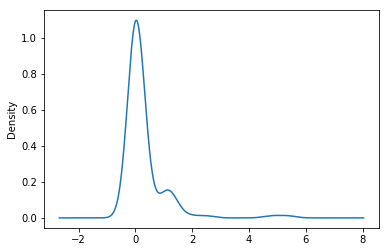

In [46]:
df_KSbacon['ratio'].plot.kde()

In [29]:
#Pivot table that sorts categories by ratio of goal / pledged
pd.pivot_table(data = df_Kickstarter, index = 'category', aggfunc = 'mean').sort_values(by='ratio', ascending=False)

,ID,backers,goal,pledged,ratio,usd pledged,usd_goal_real,usd_pledged_real
category,,,,,,,,
Tabletop Games,1.067959e+09,443.304896,1.661602e+04,35737.935123,3.160388,24310.816842,1.544749e+04,34246.158428
Camera Equipment,1.074005e+09,437.690998,4.223017e+04,85626.519927,2.700382,46505.796959,4.035078e+04,82346.586472
DIY Electronics,1.056235e+09,260.104094,3.672986e+04,27748.594035,2.489481,19737.175404,2.113008e+04,23505.586959
Robots,1.081956e+09,173.848263,2.681480e+05,37914.309250,2.376961,23645.271097,1.957564e+05,34093.545923
Wearables,1.047307e+09,394.520953,6.681191e+04,63250.296483,1.878252,32376.560509,6.135813e+04,56996.205670
3D Printing,1.074830e+09,235.298220,4.844024e+04,72140.307240,1.817931,52798.070550,4.723953e+04,67205.740742
Product Design,1.075559e+09,281.775822,3.650324e+04,32417.934357,1.735302,20507.407248,3.196555e+04,29090.485051
Letterpress,1.148238e+09,121.680851,6.162106e+03,9874.972766,1.720616,4537.572766,6.535291e+03,9986.262340
Chiptune,1.214905e+09,530.793103,7.794828e+03,20790.041034,1.684973,20954.183448,8.362192e+03,21282.243103
